## Fashion MNIST experiments

We use two models for this problem: Multi-Layer Perceptron and Convolution Neural Network. To visualize the information plane, considering the limited computation power, we choose the MLP approach and compute encoder/decoer mututal information based on a fraction of training data. 

### Model 1: Multilayer perceptron w/ Batch Normalization

In [15]:
from utils import load_mnist
import utils
import numpy as np
from mlp import Layer, LayerArgs, Model, ModelArgs
from collections import Counter
import math
from mi_tool import MI
import plot_tool
reload(plot_tool)

<module 'plot_tool' from 'plot_tool.pyc'>

In [18]:
%matplotlib inline

In [2]:
X_train, y_train = load_mnist('../fashion_mnist/', kind='train')
X_test, y_test = load_mnist('../fashion_mnist/', kind='t10k')

# normalize inputs
X_train, X_test = np.multiply(X_train, 1.0 / 255.0), np.multiply(X_test, 1.0 / 255.0)
X_train, y_train = utils.unison_shuffled_copies(X_train, y_train)
X_train_subset, y_train_subset = X_train[:10000], y_train[:10000]

In [3]:
# define the network structure with 2 hidden layers of dimension 100 and 20. 
# other parameters were set to default, activation function is set to RELU by default. 

layer_args = [LayerArgs(784, 784, layer_type = "INPUT"), \
              LayerArgs(784, 100), \
              LayerArgs(100, 20), \
              LayerArgs(20, 10, layer_type = "OUTPUT", activate = np.exp)]

# our model is using mini-batch gradient descent
# set max #(epoch) as 80 and max #(iteration) as 100000;
# For everay 1000 iterations, we compute (and plot) MI;
model_args = ModelArgs(num_passes = 80, max_iter=100000, report_interval=500)

# intialize the model
# TODO: model weights intialization by denoised autoencoder

model = Model(layer_args, model_args)
model.feed_data(X_train, y_train, X_test, y_test)
model.trial_data(X_train_subset, y_train_subset)
model.intialize_model()

In [4]:
MI_client = MI(X_train_subset, y_train_subset, 10)
MI_client.discretize()
MI_client.pre_compute()

In [5]:
for epoch, hidden_layers in model.run_model():
    MI_client.mi_single_epoch(hidden_layers, epoch)

Epoch: 1, Train Acc: 0.84835, Test Acc: 0.8327
Epoch: 2, Train Acc: 0.863566666667, Test Acc: 0.8467
Epoch: 3, Train Acc: 0.872333333333, Test Acc: 0.8532
Epoch: 4, Train Acc: 0.876233333333, Test Acc: 0.8553
Epoch: 5, Train Acc: 0.882316666667, Test Acc: 0.8624
Epoch: 6, Train Acc: 0.884516666667, Test Acc: 0.8609
Epoch: 7, Train Acc: 0.88945, Test Acc: 0.8656
Epoch: 8, Train Acc: 0.8912, Test Acc: 0.8672
Epoch: 9, Train Acc: 0.893566666667, Test Acc: 0.8679
Epoch: 10, Train Acc: 0.89485, Test Acc: 0.8707
Epoch: 11, Train Acc: 0.89665, Test Acc: 0.8704
Epoch: 12, Train Acc: 0.899333333333, Test Acc: 0.8716
Epoch: 13, Train Acc: 0.90265, Test Acc: 0.8769
Epoch: 14, Train Acc: 0.899783333333, Test Acc: 0.871
Epoch: 15, Train Acc: 0.9043, Test Acc: 0.877
Epoch: 16, Train Acc: 0.906016666667, Test Acc: 0.8774
Epoch: 17, Train Acc: 0.908116666667, Test Acc: 0.8787
Epoch: 18, Train Acc: 0.90865, Test Acc: 0.8779
Epoch: 19, Train Acc: 0.90795, Test Acc: 0.8766
Epoch: 20, Train Acc: 0.9098833

### Model 2: Convolution Neural Network (PyTorch)

For the second model, we use the classical CNN with PyTorch. The code is fairly simple as we are using libraries. 

But the layer dimension is too high, it is computationally hard to vectorize the convolution layers and computer MI in this short time frame. 

#### please refer to []

### Analysis: Information Bottleneck

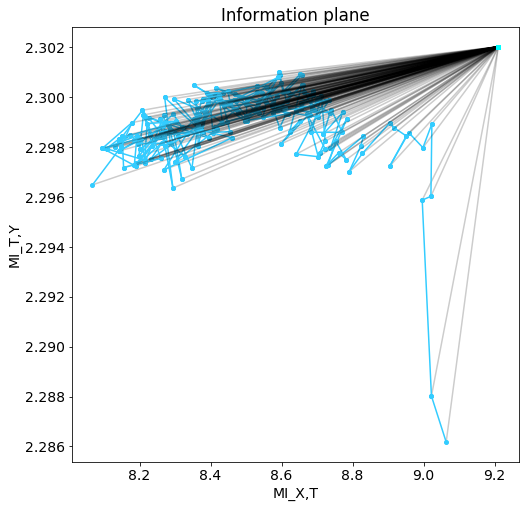

In [8]:
plot_tool.mi_plot(MI_client)

### Analysis: Visualize accuracy

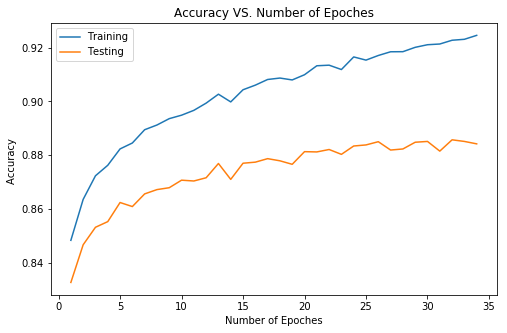

In [20]:
plot_tool.plot(model.train_log_acc, model.test_log_acc)